In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

# ====================== Load Data ======================

# File paths (Modify these as per your actual file location)
file_path_nostril = r"/home/gajendramandal/Result_analysis/P01_2/ex_2_mean_value.csv"
file_path_chest = r"/home/gajendramandal/Result_analysis/P01_2/ex_2_gt_chest_resp.csv"

# Load the CSV files
df_nostril = pd.read_csv(file_path_nostril)
df_chest = pd.read_csv(file_path_chest)

# Extract required columns
frames_nostril = df_nostril["Frame"].values
mean_values_nostril = df_nostril["Mean_Pixel_Value"].values

Time_chest = df_chest["Time(s)"].values
signal_chest = df_chest["Force"].values



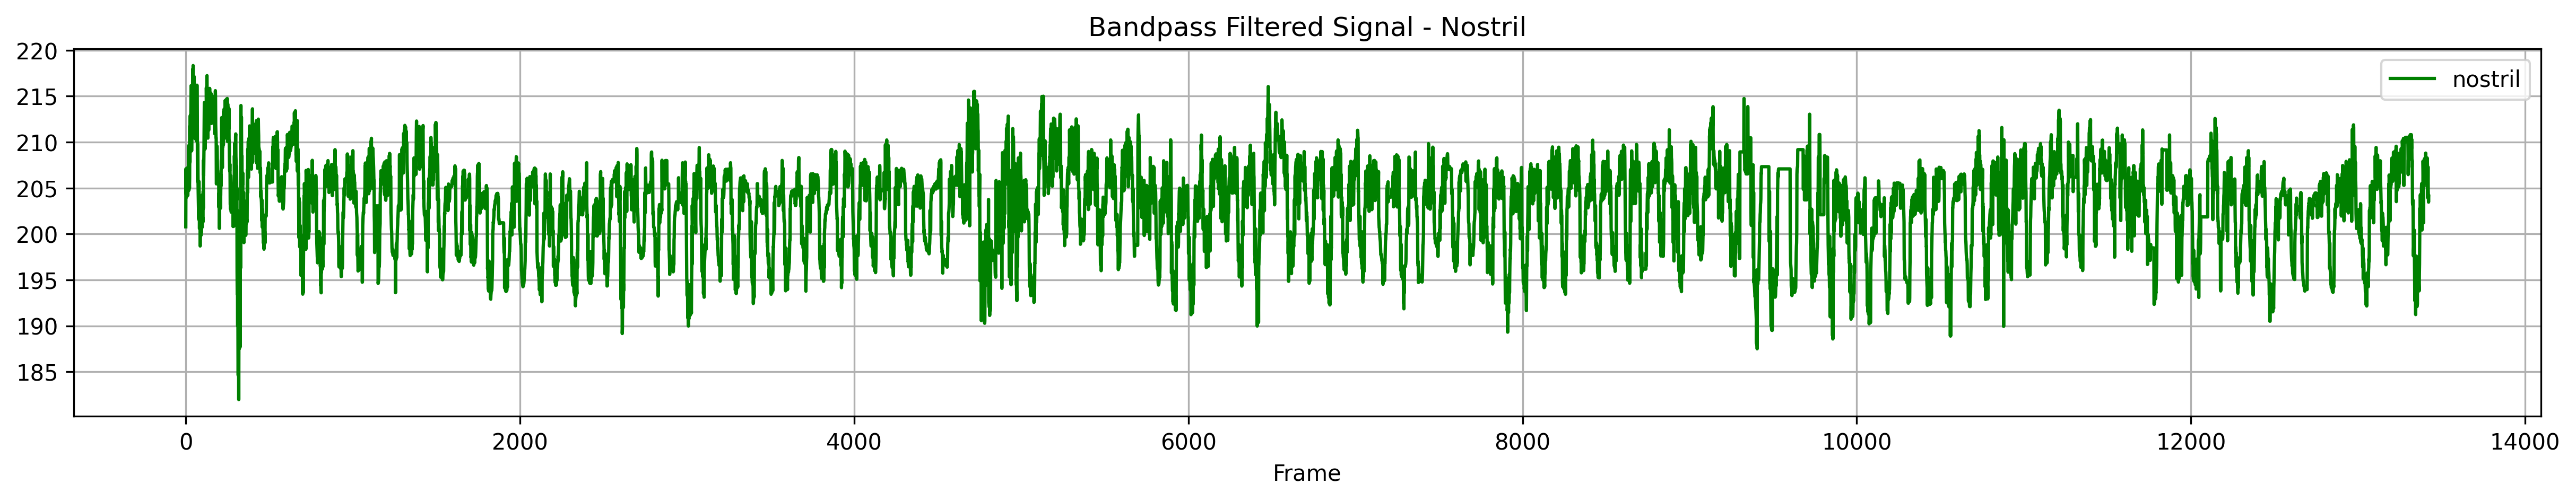

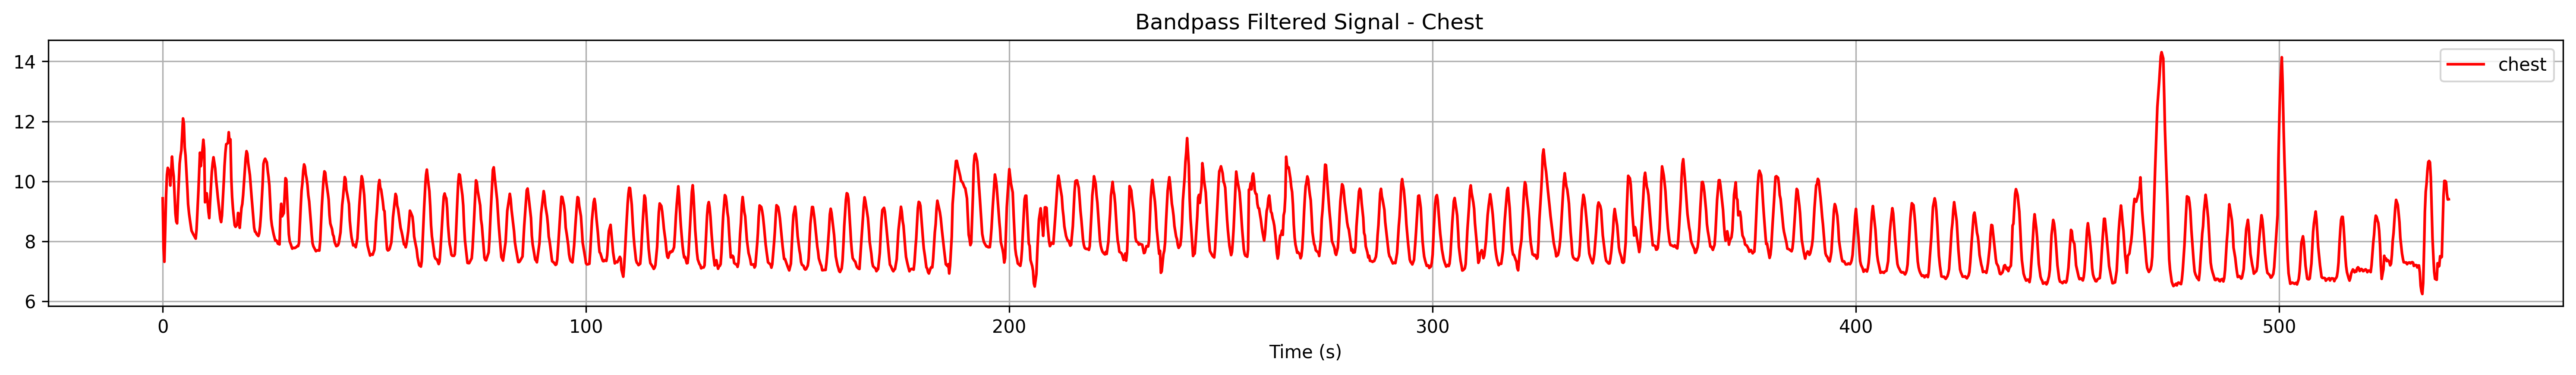

In [9]:
plt.figure(figsize=(20,3),dpi=300)
plt.plot(frames_nostril,mean_values_nostril, label="nostril", color="green")
plt.title("Bandpass Filtered Signal - Nostril")
plt.xlabel("Frame")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(20,3),dpi=300)
plt.plot(Time_chest, signal_chest, label="chest", color="red")
plt.title(" Bandpass Filtered Signal - Chest")
plt.xlabel("Time (s)")
# plt.xlim([0,60])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


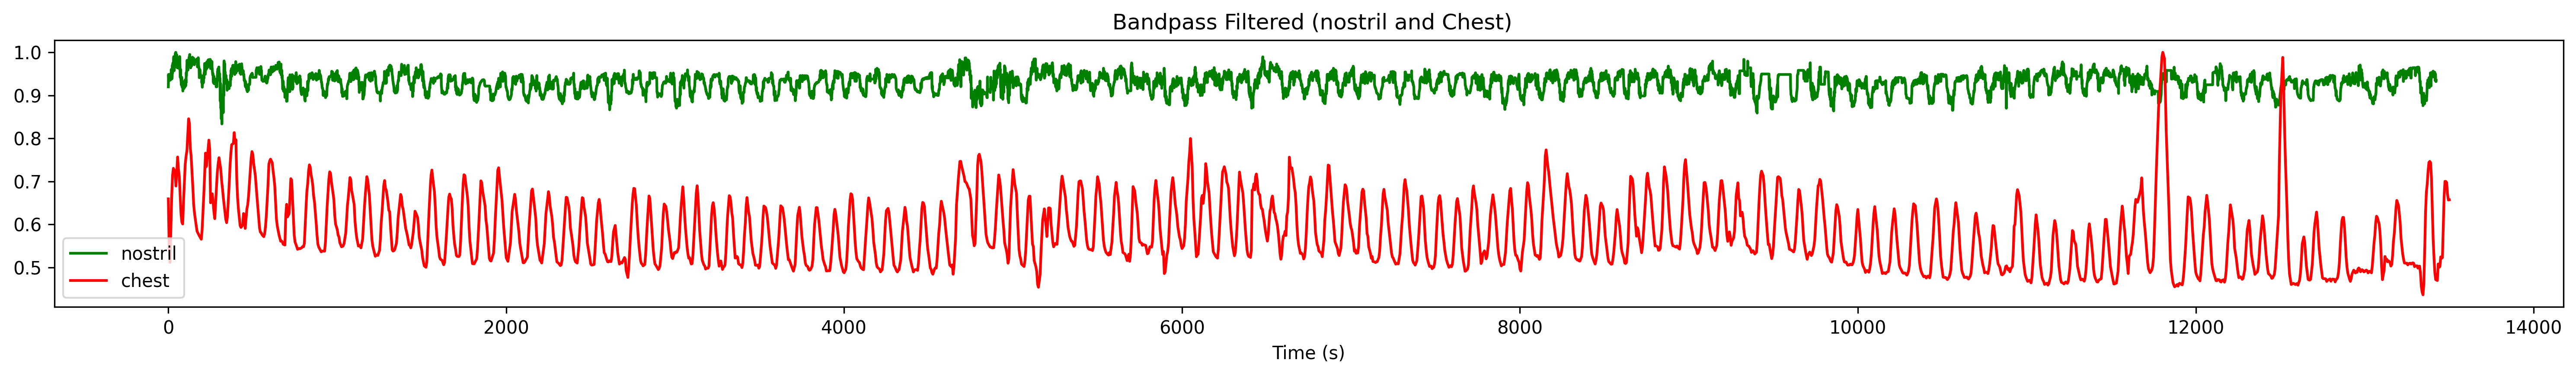

In [6]:
plt.figure(figsize=(20,3),dpi=300)
plt.plot(mean_values_nostril/max(mean_values_nostril), label="nostril", color="green")
plt.xlabel("Frame")
plt.grid()
plt.plot(signal_chest/max(signal_chest), label="chest", color="red")
plt.title(" Bandpass Filtered (nostril and Chest)")
plt.xlabel("Time (s)")
plt.legend()

# plt.xlim([0,60])
plt.grid()

plt.tight_layout()
plt.show()

In [12]:

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score
import matplotlib.pyplot as plt


predicted = mean_values_nostril/max(mean_values_nostril)
ground_truth =signal_chest/max(signal_chest)

# print("ground_truth",band_passed_chest_normalized,"\n")
# print("orgjnal_predicted",band_passed_nostril_normalized,"\n")

# Normalize signals
ground_truth_normalized = (ground_truth - ground_truth.min()) / (ground_truth.max() - ground_truth.min())
# print("ground_truth_normalised",ground_truth_normalized,"\n")
predicted_normalized = (predicted - predicted.min()) / (predicted.max() - predicted.min())
# print("predicted_normalized",predicted_normalized,"\n")

# Define window parameters
sampling_rate = 25  # in Hz
window_duration = 20  # in seconds
window_size = window_duration * sampling_rate  # Number of samples per window

# Split into windows
num_samples = len(ground_truth_normalized)
ground_truth_windows = []
predicted_windows = []

for start in range(0, num_samples, window_size):
    end = start + window_size
    if end <= num_samples: 
        ground_truth_windows.append(ground_truth_normalized[start:end])
        predicted_windows.append(predicted_normalized[start:end])



# Remove the last element
if len(predicted_windows[-1]) != 500:
    predicted_windows.pop()

# Convert to NumPy array
predicted_windows = np.array(predicted_windows)

# Verify the shape
print(predicted_windows.shape)
print(len(predicted_windows))
print([len(sublist) for sublist in predicted_windows])


print("thsi is for gt")

if len(ground_truth_windows[-1]) == 500:
    ground_truth_windows.pop()

#Convert lists to numpy arrays
ground_truth_windows = np.array(ground_truth_windows)

print(ground_truth_windows.shape)
print(len(ground_truth_windows))
print([len(sublist) for sublist in ground_truth_windows])
print(ground_truth_windows)




import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import pandas as pd

sampling_rate = 25  # Sampling rate in Hz

windows = ground_truth_windows#ground_truth_windows_list
windows_p= predicted_windows#predicted_windows_list

# Step 3: Calculate the dominant frequency in each window
dominant_frequencies = []
dominant_frequencies_p=[]

for i, window in enumerate(windows):
    frequencies, power_spectrum = periodogram(window, fs=sampling_rate)
    dominant_frequency = frequencies[np.argmax(power_spectrum)]
    dominant_frequencies.append(dominant_frequency)

for i, window in enumerate(windows_p):
    frequencies_1, power_spectrum_1 = periodogram(window, fs=sampling_rate)
    dominant_frequency_1 = frequencies_1[np.argmax(power_spectrum_1)]
    dominant_frequencies_p.append(dominant_frequency_1)

# Print the dominant frequencies for each window
for i, freq in enumerate(dominant_frequencies):
    print(f"Window {i + 1}: Dominant Frequency gt = {freq} Hz")
for i, freq in enumerate(dominant_frequencies_p):
    print(f"Window {i + 1}: Dominant Frequency pre = {freq} Hz")    
    
#save into csv
csv_file=pd.DataFrame({
    'window':np.arange(1,len(windows)+1),
    'dom_fre_gt':dominant_frequencies,
    'dom_fre_pre':dominant_frequencies_p,
})
csv_file.to_csv("/home/gajendramandal/Result_analysis/P01_2/ex_2_without_bandpass_dominant_frequencies.csv",index=False)


(26, 500)
26
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
thsi is for gt
(26, 500)
26
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
[[0.39562863 0.35419695 0.31276527 ... 0.58644286 0.58428877 0.58213468]
 [0.57998059 0.57244193 0.56490328 ... 0.27545165 0.273171   0.27089035]
 [0.26860971 0.26411178 0.25961386 ... 0.19398114 0.19056017 0.1871392 ]
 ...
 [0.09692748 0.09312647 0.08932545 ... 0.11643972 0.10877413 0.10110854]
 [0.09344295 0.09103556 0.08862817 ... 0.62014596 0.65226513 0.6843843 ]
 [0.71650348 0.74184389 0.7671843  ... 0.09490014 0.09515344 0.09540674]]
Window 1: Dominant Frequency gt = 0.30000000000000004 Hz
Window 2: Dominant Frequency gt = 0.2 Hz
Window 3: Dominant Frequency gt = 0.25 Hz
Window 4: Dominant Frequency gt = 0.25 Hz
Window 5: Dominant Frequency gt = 0.25 Hz
Window 6: Dominant Frequency 

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score
import matplotlib.pyplot as plt


file=pd.read_csv(r"/home/gajendramandal/Result_analysis/P01_2/ex_2_without_bandpass_dominant_frequencies.csv")

print(file["dom_fre_gt"].values)
print(file["dom_fre_pre"].values)

ground_truth_windows=file["dom_fre_gt"].values
predicted_windows=file["dom_fre_pre"].values
window_no=file["window"].values

# Calculate error metrics per window
mae_per_window = []
rmse_per_window = []

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window) ** 2))  # Root Mean Square Error (RMSE)

          
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)

mean_MAE=np.mean(mae_per_window)
# print("mean of MAE",mean_MAE)
print("mean of MAE",round(mean_MAE,2))
mean_RMSE=np.mean(rmse_per_window)
# print("mean of RMSE",mean_RMSE)
print("mean of RMSE",round(mean_RMSE,2))

#save into csv
csv_file=pd.DataFrame({
    'window':np.arange(1,len(windows)+1),
    'dom_fre_gt':dominant_frequencies,
    'dom_fre_pre':dominant_frequencies_p,
    'mae_per_window':mae_per_window,
    'rmse_per_window':rmse_per_window,
    "mean of MAE":round(mean_MAE,2),
    "mean of RMSE":round(mean_RMSE,2),
})
csv_file.to_csv("/home/gajendramandal/Result_analysis/P01_2/ex_2_without_bandpass_result.csv",index=False)


[0.3  0.2  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.05 0.25 0.2  0.25 0.25
 0.2  0.25 0.2  0.25 0.2  0.2  0.2  0.2  0.25 0.15 0.3  0.15]
[0.2  0.2  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.1  0.25 0.3  0.25 0.2
 0.2  0.25 0.2  0.25 0.25 0.2  0.2  0.2  0.25 0.15 0.25 0.3 ]
mean of MAE 0.02
mean of RMSE 0.02
